In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

import model
import helper

In [46]:
model_copy_vae = model.VaeFinal_only_one_hidden_copy()
model_copy_vae = helper.import_model_name_weights_copy(model_x=model_copy_vae, activate_eval=True)

In [10]:
import MyDataSet
import pandas as pd
import torch
# dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=-1)
with torch.no_grad():
    dataset_49 = MyDataSet.MyDataSets_Subset_4_9(batch_size_train=-1)
    # dataset_test_9 = MyDataSet.MyDataSets_Subset_9(batch_size_train=-1)
    img_49_batch, label_49_batch = next(iter(dataset_49.train_loader_subset_changed_labels))
    rec49,mu49,sigma49 = model_copy(img_49_batch.clone())
    z = mu49
    print(f'{mu49.shape = }')
    print(f'{z.shape = }')
    print(f'{label_49_batch.shape = }')
    # df = pd.read_csv(lattent)

MyDataSets.MyDataSets_Subset_4_9.__init__
mu49.shape = torch.Size([11791, 2])
z.shape = torch.Size([11791, 2])
label_49_batch.shape = torch.Size([11791])


In [11]:
df = pd.DataFrame({'z0': rec49[:,0], 'z1': rec49[:,1], 'labels': label_49_batch})


In [12]:
# df['labels'].iloc[1
# ]
# df['z']

In [13]:
import MyDataSet
mcd = MyDataSet.MyCustomDataset(df)
mcd.__len__()

11791

In [14]:
import torch
dataloader = torch.utils.data.DataLoader(mcd,batch)

NameError: name 'batch' is not defined

In [15]:
dataIter = iter(dataloader)

NameError: name 'dataloader' is not defined

In [16]:
next(dataIter)

NameError: name 'dataIter' is not defined

In [17]:
import MyDataSet
import pandas as pd
import torch
# dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=-1)
with torch.no_grad():
    dataset_49 = MyDataSet.MyDataSets_Subset_4_9(batch_size_train=-1)
    # dataset_test_9 = MyDataSet.MyDataSets_Subset_9(batch_size_train=-1)
    img_49_batch, label_49_batch = next(iter(dataset_49.train_loader_subset_changed_labels))
    rec49,mu49,sigma49 = model_copy(img_49_batch.clone())
    z = mu49
df = pd.DataFrame({'z0': rec49[:,0], 'z1': rec49[:,1], 'labels': label_49_batch})
mcd = MyDataSet.MyCustomDataset(df)
dataloader = torch.utils.data.DataLoader(mcd)


MyDataSets.MyDataSets_Subset_4_9.__init__


In [18]:
import model_probit
pick_model = model_probit.latent_space()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)

In [19]:
pick_model(z[:20])
label_49_batch[
    :20
]

tensor([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [20]:
pick_model(z[:20])


tensor([[0.5274],
        [0.4694],
        [0.4813],
        [0.4334],
        [0.4951],
        [0.4983],
        [0.5679],
        [0.4329],
        [0.4841],
        [0.4949],
        [0.4558],
        [0.5380],
        [0.4939],
        [0.5634],
        [0.5004],
        [0.4669],
        [0.5086],
        [0.5115],
        [0.5273],
        [0.5130]], grad_fn=<SigmoidBackward0>)

In [21]:
for x in pick_model.parameters():
    print(x)
    # print(x.data)

Parameter containing:
tensor([[ 0.1230, -0.3847]], requires_grad=True)
Parameter containing:
tensor([0.0013], requires_grad=True)


In [24]:
labels =label_49_batch
pred =  pick_model(z)
pred_class = pred.argmax(dim=1)
print(pred_class[10000:])

tensor([0, 0, 0,  ..., 0, 0, 0])


In [23]:
accuracy = pred_class==labels
correct = accuracy.sum()
print(pred_class.shape)
print(f'{correct = }')
print(pred_class.shape[0]/correct)

torch.Size([11791])
correct = tensor(5842)
tensor(2.0183)


In [ ]:
# print(accuracy.where(True))

In [25]:
i = 0
for x in pick_model.parameters():
    print(x)
    i+=1
    # print(x.data)

Parameter containing:
tensor([[ 0.1230, -0.3847]], requires_grad=True)
Parameter containing:
tensor([0.0013], requires_grad=True)


In [28]:
iterweights = iter(pick_model.parameters())
w = next(iterweights).data
w0 = next(iterweights).data
print(w,w0)

tensor([[ 0.1230, -0.3847]]) tensor([0.0013])


In [32]:
rand_tensor = torch.rand(2)
print(rand_tensor)

tensor([0.5506, 0.0284])


tensor([-3.5331e-04,  8.5566e-04,  1.1505e-03,  4.6542e-04, -4.0841e-04,
         2.0493e-03, -1.4270e-03,  3.0001e-04,  7.3332e-04,  1.4707e-03,
         1.0781e-03,  1.0915e-03, -1.4824e-03, -1.3175e-03, -1.2336e-04,
         8.7532e-04, -1.2909e-03, -2.6412e-05, -2.4759e-03, -1.1528e-03,
         1.3005e-04,  3.6414e-04, -1.7821e-03, -8.8561e-04,  1.0771e-03,
         1.8296e-04,  2.2869e-03,  1.3089e-05, -8.0577e-04, -4.4084e-04,
         1.4430e-03,  2.1007e-03,  9.7671e-04,  1.9924e-03, -5.2819e-04,
        -1.0860e-03, -6.1981e-04, -2.0721e-03, -1.4996e-04,  6.1361e-04,
         9.2124e-04, -1.1428e-04,  8.2584e-04,  6.8929e-04, -2.6949e-04,
        -1.0743e-03,  1.6878e-03, -1.0317e-03,  1.5551e-03,  1.2258e-04,
         1.4240e-03, -2.6023e-03, -1.5295e-03,  1.0991e-03, -1.4245e-03,
        -5.4905e-05, -1.1285e-03,  3.4468e-04,  2.5382e-03,  9.0950e-04,
        -8.6494e-04, -1.2787e-03,  3.5782e-03, -4.5043e-04,  7.3215e-04,
        -1.3921e-04, -1.0296e-03, -5.2815e-05, -7.3

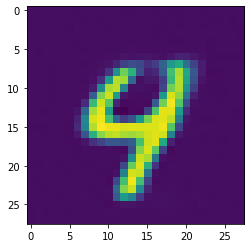

In [47]:
import matplotlib.pyplot as plt
with torch.no_grad():
    decoded = model_copy_vae.decode(rand_tensor)
print(decoded)
plt.imshow(decoded.view(28,28))

In [41]:
new = rand_tensor * w + w0
print(new)

tensor([[ 0.0691, -0.0096]])


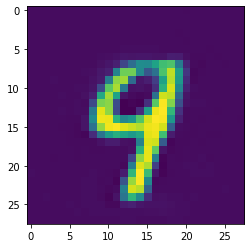

In [49]:
with torch.no_grad():
    counter_img = model_copy_vae.decode(new)
# plt.imshow(pick_model(new).view(28,28))
plt.imshow(counter_img.view(28,28))

alpha_i = tensor([[ 0.1208,  0.7245],
        [-0.0386, -0.2317]])
tensor([-0.5324,  0.1514])


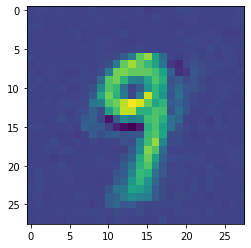

In [54]:
alpha_i = - (torch.t(z[0]) * w + w0) / torch.t(w) * w
print(f'{alpha_i = }')
print(z[1])
with torch.no_grad():
    org_recons_img = model_copy_vae.decode(z[0])
    plt.imshow(org_recons_img.view(28,28))

In [55]:
model_copy = model.VaeFinal_only_one_hidden_copy()
model_copy = helper.import_model_name_weights_copy(model_x=model_copy, activate_eval=True)
# dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=-1)
with torch.no_grad():
    dataset_49 = MyDataSet.MyDataSets_Subset_4_9(batch_size_train=-1)
    img_49_batch, label_49_batch = next(iter(dataset_49.train_loader_subset_changed_labels))
    rec49, mu49, sigma49 = model_copy(img_49_batch.clone())
    z = mu49

MyDataSets.MyDataSets_Subset_4_9.__init__


In [77]:
iterweights = iter(pick_model.parameters())
w = next(iterweights).data
w0 = next(iterweights).data
print(w,w0)

tensor([[ 0.1230, -0.3847]]) tensor([0.0013])


tensor([[ 0.1230, -0.3847]]) tensor([0.0013])
tensor(0.0013)
alpha_i = tensor([-0.1277,  0.0404])
tensor([1.0270, 0.1085])


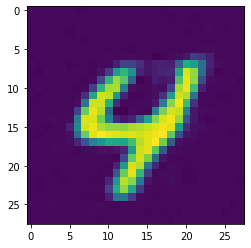

In [99]:
STEPS = 100
iterweights = iter(pick_model.parameters())
w = next(iterweights).data
w0 = next(iterweights).data
print(w,w0)
w = w[0]
w0 = w0[0]
print(w0)
alpha_i = - (torch.t(z[0]) * w + w0) / torch.t(w) * w
print(f'{alpha_i = }')
print(f'{z[0]}')
with torch.no_grad():
    org_recons_img = model_copy_vae.decode(z[0])
    plt.imshow(org_recons_img.view(28,28))
z_counter = z[0] + STEPS * alpha_i*w
# print(f'{z_counter = }')
# print(f'{torch.t(z[0]) = }')
# print(f'{torch.t(w) = }')
# print(f'{w.squeeze(dim = 0)[:] = }')
# with torch.no_grad():
#     z_counter_recons_img = model_copy_vae.decode(z_counter)
#     plt.imshow(z_counter_recons_img.view(28,28))
#     print(f'{z_counter = }')
# print(f'{z[0] = }')


z_counter = tensor([-0.5444, -1.4454])
z[0] = tensor([1.0270, 0.1085])


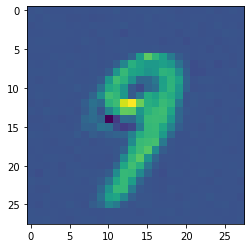

In [100]:
with torch.no_grad():
    z_counter_recons_img = model_copy_vae.decode(z_counter)
    plt.imshow(z_counter_recons_img.view(28,28))
    print(f'{z_counter = }')
print(f'{z[0] = }')

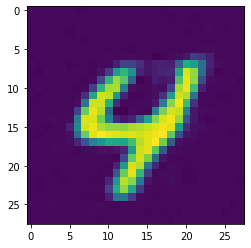

In [104]:
with torch.no_grad():
    org_recons_img = model_copy_vae.decode(z[0])
    plt.imshow(org_recons_img.view(28,28))

alpha_i = tensor([-0.1277,  0.0404])
tensor([1.0270, 0.1085])
z = tensor([1.0270, 0.1085])
z_counter = tensor([ 0.8699, -0.0469])
z_counter = tensor([ 0.8699, -0.0469])


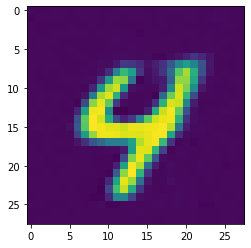

In [111]:
def plt_show_counter_with_steps(z,steps):
    STEPS = steps
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (torch.t(z) * w + w0) / torch.t(w) * w
    print(f'{alpha_i = }')
    print(f'{z}')
    z_counter = z + STEPS * alpha_i*w
    print(f'{z = }')
    print(f'{z_counter = }')

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        plt.imshow(z_counter_recons_img.view(28,28))
        print(f'{z_counter = }')

plt_show_counter_with_steps(z[0], 10)

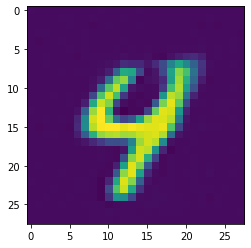

In [122]:
def return_counter_with_steps(z,steps=20):
    STEPS = steps
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (torch.t(z) * w + w0) / torch.t(w) * w
    z_counter = z + STEPS * alpha_i*w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')

    return z_counter_recons_img.view(28,28)
plt.imshow(return_counter_with_steps(z=z[0],steps=20))
# plt.imshow(return_counter_with_steps(z=z[0],steps=100))

In [157]:
def return_counter_with_steps(z,steps=20):
    STEPS = steps
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (z * w + w0) / torch.t(w) * w
    # alpha_i = - (torch.t(z) * w + w0) / torch.t(w) * w
    z_counter = z + STEPS * alpha_i*w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')
    print(z_counter_recons_img.view(-1,1,28,28).shape)
    return z_counter_recons_img.view(-1,1,28,28)
counter_factuals = return_counter_with_steps(z=z,steps=20)
print(counter_factuals.shape)
# plt.imshow(return_counter_with_steps(z=z[0],steps=100))

torch.Size([11791, 1, 28, 28])
torch.Size([11791, 1, 28, 28])


torch.Size([11791, 1, 28, 28])


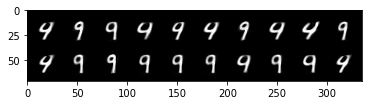

In [166]:
from torchvision.utils import make_grid
import numpy as np
with torch.no_grad():
    counter_factuals = return_counter_with_steps(z=z,steps=20)
    counter_factuals = counter_factuals.clip(0,1)
    counter_factuals = counter_factuals[:20]
    counter_factuals = make_grid(counter_factuals, 10, 5)
    # counter_factuals = make_grid(tensor=list(counter_factuals))
    # counter_factuals = test_images.numpy()
    counter_factuals = np.transpose(counter_factuals, (1, 2, 0))
    plt.imshow(counter_factuals)
    plt.show()

In [210]:
def return_counter_with_x_steps(z_one_image:torch.Tensor, steps_x_alpha_i:int=20):
    # STEPS = steps
    # STEPS = torch.linspace(1, steps_x_alpha_i, steps=steps_x_alpha_i)
    z_ones = torch.ones(steps_x_alpha_i+1)
    # torch.fill(z_ones,z_one_image.item())
    STEPS = torch.linspace(0, steps_x_alpha_i, steps=steps_x_alpha_i+1)

    STEPS = STEPS.unsqueeze(dim = 1)
    STEPS = STEPS * z_one_image
    print(f'{STEPS = }')
    print(f'{z_one_image = }')
    print(f'{z_ones = }')
    print(f'{STEPS = }')
    z_one_image = z_ones * torch.t(z_one_image)
    # z_one_image = z_one_image.repeat(2,steps_x_alpha_i)
    print('------')
    print(f'{z_one_image = }')
    # print(STEPS.unsqueeze(dim = 1))
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (z_one_image * w + w0) / torch.t(w) * w
    # z_counter = z + torch.t(STEPS) * alpha_i * w
    # z_counter = z + STEPS * torch.t(alpha_i) * w
    z_counter = z + STEPS * alpha_i * w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')
    print(z_counter_recons_img.view(-1, 1, 28, 28).shape)
    return z_counter_recons_img.view(-1, 1, 28, 28)


counter_factuals = return_counter_with_x_steps(z_one_image=z[0], steps_x_alpha_i=20)
print(counter_factuals.shape)

STEPS = tensor([[ 0.0000,  0.0000],
        [ 1.0270,  0.1085],
        [ 2.0540,  0.2170],
        [ 3.0810,  0.3255],
        [ 4.1080,  0.4340],
        [ 5.1351,  0.5425],
        [ 6.1621,  0.6510],
        [ 7.1891,  0.7595],
        [ 8.2161,  0.8680],
        [ 9.2431,  0.9766],
        [10.2701,  1.0851],
        [11.2971,  1.1936],
        [12.3241,  1.3021],
        [13.3511,  1.4106],
        [14.3782,  1.5191],
        [15.4052,  1.6276],
        [16.4322,  1.7361],
        [17.4592,  1.8446],
        [18.4862,  1.9531],
        [19.5132,  2.0616],
        [20.5402,  2.1701]])
z_one_image = tensor([1.0270, 0.1085])
z_ones = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.])
STEPS = tensor([[ 0.0000,  0.0000],
        [ 1.0270,  0.1085],
        [ 2.0540,  0.2170],
        [ 3.0810,  0.3255],
        [ 4.1080,  0.4340],
        [ 5.1351,  0.5425],
        [ 6.1621,  0.6510],
        [ 7.1891,  0.7595],
        [ 8.2161,  0.8

RuntimeError: The size of tensor a (21) must match the size of tensor b (2) at non-singleton dimension 0